## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_study = pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "left" )

# Display the data table for preview
mice_study.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_study.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Remove any mice that have duplicate ID and Timepoints
clean_mice = mice_study.drop_duplicates(subset=["Mouse ID","Timepoint"], inplace= False)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.



In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary = clean_mice.groupby(["Drug Regimen"])

# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender

mean = drug_summary['Tumor Volume (mm3)'].mean()
median = drug_summary['Tumor Volume (mm3)'].median()
var = drug_summary['Tumor Volume (mm3)'].var()
std = drug_summary['Tumor Volume (mm3)'].std()
sem = drug_summary['Tumor Volume (mm3)'].sem()




# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_sum_df = pd.DataFrame({"Tumor Vol Median":median,
                              "Tumor Vol Mean":mean,
                              "Tumor Vol Variance":var,
                              "Tumor Vol Stdev":std,
                              "Tumor Vol SEM":sem })
# Assemble the resulting series into a single summary dataframe.
drug_sum_df



,Tumor Vol Median,Tumor Vol Mean,Tumor Vol Variance,Tumor Vol Stdev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.909965,52.393463,43.138803,6.568014,0.525862
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

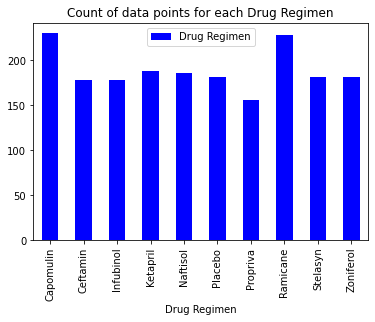

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = pd.DataFrame(drug_summary["Drug Regimen"].count())
bar_chart = drug_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")


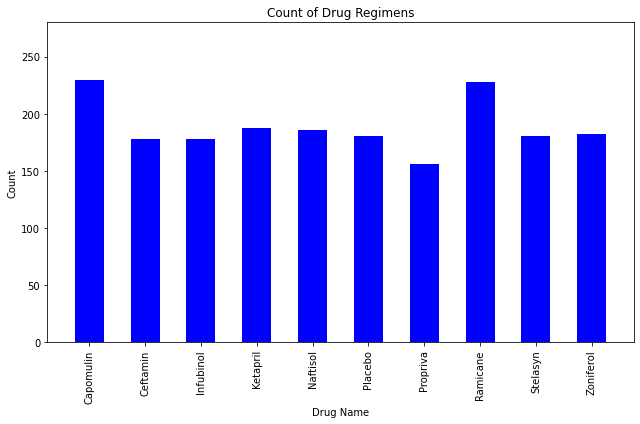

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_count))
tick_locations = [value for value in x_axis]

#create the bar chart
plt.figure(figsize=(9,6))
plt.bar(x_axis, drug_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_count.index), rotation="vertical")

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(drug_count["Drug Regimen"])+50)

# Give our chart some labels and a tile
plt.title("Count of Drug Regimens")
plt.xlabel("Drug Name")
plt.ylabel("Count")


plt.tight_layout()
plt.show()


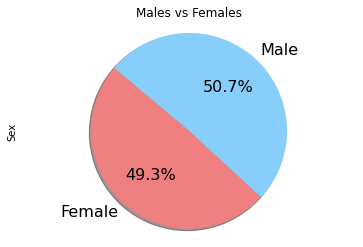

In [11]:
#Group by Gender to put into a pie chart
gender_group = clean_mice.groupby(["Sex"])
gender_count = pd.DataFrame(gender_group["Sex"].count())
# gender_count

# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind='pie', y='Sex', \
                        title="Males vs Females",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["lightcoral", "lightskyblue"],legend =False)

#make it equal and not oblong in shape
plt.axis("equal")
plt.show()

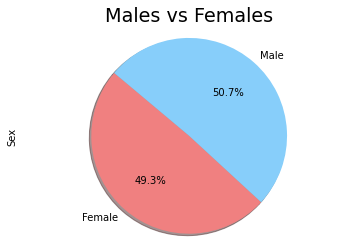

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(gender_count.index.values)

# The values of each section of the pie chart
gender_counts = gender_count['Sex']

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Males vs Females")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Create a list for Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = clean_mice[clean_mice["Drug Regimen"].isin(drug_list)]
# four_drugs.head()

# Start by getting the last (greatest) timepoint for each mouse
last_time = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

last_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               38.983
             b742               38.940
             f966               30.486
             g288               37.074
             g316               40.159
...                                ...
Ramicane     s508               30.276
             u196               40.668
             w678               43.166
             y449               44.183
             z578               30.639

[100 rows x 1 columns]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
last_time_unstack = last_time.stack(level=0).unstack(level=0)
# View the result to confirm transpose
last_time_unstack.head()

for drug in drug_list:
    quartiles = last_time_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")

Capomulin IQR data is:
The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.12 
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.
Ramicane IQR data is:
The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.
Ceftamin IQR data is:
The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartil

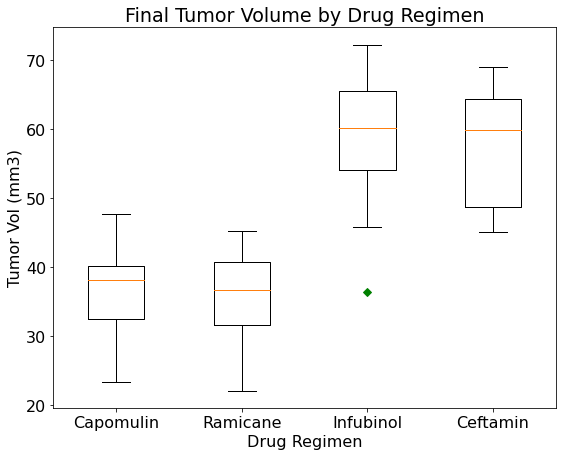

In [17]:
# Create empty list to fill with tumor vol data (for plotting)
empty = []

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for drug in drug_list:
    empty.append(list(last_time_unstack[drug].dropna()))

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(empty,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
